# Object: Flower

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
folder = '/content/drive/MyDrive/AI-project/flower/flower_train/'
x_train,y_train=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('apricot '): 
    output=1
  if file.startswith('daisy '): 
    output=2
  if file.startswith('lotus '): 
    output=3  
  if file.startswith('rose '): 
    output=4
  if file.startswith('water lily '): 
    output=5
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train=asarray(x_train) 
y_train=asarray(y_train)
y_train =to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy',x_train)
save('y_train.npy',y_train)

x_train = x_train.reshape(1000, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

folder = '/content/drive/MyDrive/AI-project/flower/flower_test/'
x_test,y_test=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('apricot '): 
    output=1
  if file.startswith('daisy '): 
    output=2
  if file.startswith('lotus '): 
    output=3  
  if file.startswith('rose '): 
    output=4
  if file.startswith('water lily '): 
    output=5
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test=asarray(x_test) 
y_test=asarray(y_test) 
y_test =to_categorical(y_test)
print(x_test.shape,y_test.shape)
save('x_test.npy',x_test)
save('y_test.npy',y_test)

x_test = x_test.reshape(50, 30, 30, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

(1000, 30, 30, 3) (1000, 6)
(1000, 30, 30, 3)
(50, 30, 30, 3) (50, 6)
(50, 30, 30, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

Epoch 1/100
16/16 [==============================] - 4s 203ms/step - loss: 1.6568 - accuracy: 0.2080
Epoch 2/100
16/16 [==============================] - 3s 203ms/step - loss: 1.5240 - accuracy: 0.2930
Epoch 3/100
16/16 [==============================] - 5s 341ms/step - loss: 1.4156 - accuracy: 0.3490
Epoch 4/100
16/16 [==============================] - 3s 199ms/step - loss: 1.3526 - accuracy: 0.4070
Epoch 5/100
16/16 [==============================] - 3s 196ms/step - loss: 1.2460 - accuracy: 0.4940
Epoch 6/100
16/16 [==============================] - 3s 205ms/step - loss: 1.2586 - accuracy: 0.4830
Epoch 7/100
16/16 [==============================] - 5s 327ms/step - loss: 1.1590 - accuracy: 0.5360
Epoch 8/100
16/16 [==============================] - 3s 201ms/step - loss: 1.1101 - accuracy: 0.5670
Epoch 9/100
16/16 [==============================] - 3s 198ms/step - loss: 1.0591 - accuracy: 0.5790
Epoch 10/100
16/16 [==============================] - 3s 203ms/step - loss: 1.1037 - accura

In [ ]:
model.save('flower.h5')

Input Flower: water lily
1/1 [==============================] - 0s 31ms/step
Predicted label: water lily
1/1 [==============================] - 0s 38ms/step
Predicted label: water lily
1/1 [==============================] - 0s 47ms/step
Predicted label: lotus
1/1 [==============================] - 0s 42ms/step
Predicted label: water lily
1/1 [==============================] - 0s 41ms/step
Predicted label: water lily
1/1 [==============================] - 0s 37ms/step
Predicted label: water lily
1/1 [==============================] - 0s 41ms/step
Predicted label: water lily
1/1 [==============================] - 0s 52ms/step
Predicted label: water lily
1/1 [==============================] - 0s 39ms/step
Predicted label: lotus
1/1 [==============================] - 0s 39ms/step
Predicted label: daisy


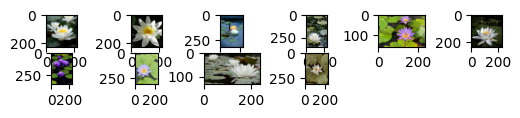

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
folder = '/content/drive/MyDrive/AI-project/flower/flower_test/'

dict = {1:'apricot', 2:'daisy', 3:'lotus', 4:'rose', 5:'water lily'}

input_ = input("Input Flower: ")
for i in range(10):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
 
  prediction = model.predict(img_arr)
  
  label = np.argmax(prediction)
  print('Predicted label:', dict[label])
plt.show()

1/1 [==============================] - 0s 47ms/step
Predicted label: rose


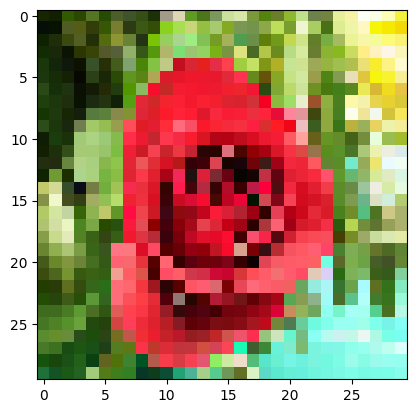

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/AI-project/flower/rose.jpg',target_size=(30,30))
dict = {1:'apricot', 2:'daisy', 3:'lotus', 4:'rose', 5:'water lily'}
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,30,30,3)
img = img.astype('float32')/255
prediction = model.predict(img)  
label = np.argmax(prediction)
print('Predicted label:', dict[label])